# Dense Coding

## 2 bits from a Qubit

Let's start this question with the standard SuperDense Coding protocol, given in QCQI (page 97), which uses a *maximally* entangled two-qubit state 

$$\left(\frac{|00\rangle + |11\rangle}{\sqrt{2}}\right)\$$

to allow Alice to transmit 2 bits of information to Bob, by sending her qubit to Bob.

Describe the protocol briefly in your own words. Since this is an SoC and requires coding (*wink wink*), code up the circuit in Qiskit. 

Specifically, code up a circuit which changes depending on the message (of two bits) being transferred (you can pass the circuit and the message as parameters to a function, for example)

In [34]:
import numpy as np
from qiskit import *

# Alice and Bob share a pre-entangled qubit which we represent as Q=(|00⟩+|11⟩)/√2.

qc = QuantumCircuit(2,2)
qc.initialize([1, 0], [0])
qc.initialize([1, 0], [1])
qc.h(0)
qc.cx(0,1)

# Assuming Alice wants to communicate two bits of information to Bob, she applies one of four gates to her qubit.
def denseCoding (qc, bit1, bit2):
  if (bit1 == 0 and bit2 == 0):
    qc.i(0)
  elif (bit1 == 0 and bit2 == 1):
    qc.x(0)
  elif (bit1 == 1 and bit2 == 0):
    qc.z(0)
  elif (bit1 == 1 and bit2 == 1):
    qc.x(0)
    qc.z(0)
  else:
    print("Invalid bits: Only send 2 bits of 0 or 1")
# Show the entangled qubit after she applies the Quantum Gate
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
# She then sends her modified qubit to Bob who measures the sent qubit and extracts the classical information.
def sendBits(qc):
  qc.cx(0,1)
  qc.h(0)
  qc.measure(0,0)
  qc.measure(1,1)
# Print the measurement results
def measure(qc):
  simulator = Aer.get_backend('qasm_simulator')
  job = execute(qc, simulator, shots=1)
  result = job.result()
  counts = result.get_counts()
  print(counts)
  
  
if(__name__ == "__main__"):
  denseCoding(qc,0,1)
  sendBits(qc)
  measure(qc)
  print(qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
{'10': 1}
     ┌─────────────────┐┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├──■──┤ X ├──■──┤ H ├┤M├
     ├─────────────────┤└───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ┤ Initialize(1,0) ├─────┤ X ├─────┤ X ├─┤M├──╫─
     └─────────────────┘     └───┘     └───┘ └╥┘  ║ 
c: 2/═════════════════════════════════════════╩═══╩═
                                              1   0 


## Transmitting 3 bits

You've now transmitted 2 bits successfully using a quantum channel. What else can we do?

Suppose Alice and Bob now share a 3 qubit entangled state, with Alice having 2 out of the 3 qubits. Their goal is to transmit 3 bits, using those 3 qubits. 

1. Propose a 3 qubit state which would suit Alice and Bob. Take inspiration from the previous part, and why you think the protocol for 2 qubits works.

2. Now that you have a shared state, design a protocol, that allows Alice to transmit a 3 bit message, by sending her 2 qubits to Bob. You can also code it up on Qiskit, with the same specifications as the previous coding task.

Write about the state and the protocol here : 

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
{'110': 1}


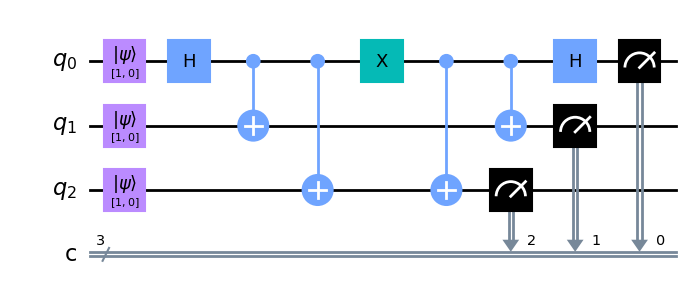

In [35]:
# Write your code for the protocol below
import numpy as np
from qiskit import *

circ = QuantumCircuit(3,3)
circ.initialize([1, 0], [0])
circ.initialize([1, 0], [1])
circ.initialize([1, 0], [2])
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
simulator = Aer.get_backend('statevector_simulator')
job = execute(circ, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
#-----------------------------------------------------------
def denseCoding(circ, bit1, bit2, bit3):
  if (bit1 == 0 and bit2 == 0 and bit3 == 0):
    circ.i(0)
  elif (bit1 == 0 and bit2 == 0 and bit3 == 1):
    circ.x(0)
    circ.x(1)
  elif (bit1 == 0 and bit2 == 1 and bit3 == 0):
    circ.x(1)
  elif (bit1 == 1 and bit2 == 0 and bit3 == 0):
    circ.z(0)
  elif (bit1 == 0 and bit2 == 1 and bit3 == 1):
    circ.x(0)
  elif (bit1 == 1 and bit2 == 0 and bit3 == 1):
    circ.x(0)
    circ.x(1)
    circ.z(0)
  elif (bit1 == 1 and bit2 == 1 and bit3 == 0):
    circ.x(1)
    circ.z(0)
  elif (bit1 == 1 and bit2 == 1 and bit3 == 1):
    circ.x(0)
    circ.z(0)
  else:
    print("Invalid bits entered: Only enter 3 bits of 0 or 1")
#-----------------------------------------------------------

denseCoding(circ, 0,1,1)

circ.cx(0,2)
circ.cx(0,1)
circ.h(0)
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)

simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1)
result = job.result() 
counts = result.get_counts()
print(counts)
circ.draw('mpl')

3. Suppose Bob wanted to send some information to Alice. Show that he can't design a protocol to send more than 2 qubits of information with the 1 qubit he can send.

Answer: Since there are only 4 bell states we cannot send more than 2 bits of information using this protocol and in general it is not possible since a qubit only has two orthogonal bases.

## Doing Better

You might have seen that we're transmitting 2 qubits to send 3 bits of information here, which is less efficient than transmitting 1 qubit to get 2 bits of information.

An obvious way to do better is to do the previous protocol twice, and get 4 bits of information for the two qubits transferred.

Can you think of a way to achieve this, in a similar line to the previous methods, but with one common shared state (and not two separate Bell states)?

Hint : Think of a 4 qubit state to share, and see if Alice, with her two qubits, can operate her qubits in different ways so as to get other basis states

Answer: https://arxiv.org/pdf/quant-ph/0407193.pdf
Basically a small extension of the upper part to include some more combinations of X and Z gates and the starting state is a maximally entangled state.